# Machine Learning. Classical algorithms.
<br>

<br><br>
**Setting:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a customer is cheaper than acquiring a new one. In addition, a new client may turn out to be weakly interested in the services of the business and it will be difficult to work with him, while there is already the necessary data on interaction with the service about old clients.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp;Accordingly, by predicting the outflow, we can react in time and try to keep the client who wants to leave. Based on data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the retention task easier to implement than the task of attracting new users that we don't know anything about yet.<br>

&nbsp;&nbsp;&nbsp;&nbsp; The data set from a telecommunications company is provided. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, the amount of payment.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; The task is to analyze the data and predict the outflow of users (to identify people who will renew the contract and who will not). The work must include the following mandatory items:
1. Description of data *(with calculation of basic statistics)*,
2. Examination of dependencies and formulation of hypotheses,
3. Building models for predicting outflow *(with justification for choosing a particular model)* based on tested hypotheses and identified relationships,
4. Comparison of the quality of the obtained models.

In the second section, there must be a substantiation of hypotheses, a detailed description of the identified relationships, as well as their visualization.
<br>In the fourth, the general conclusions of the work should be formulated additionally.

<br><br>


## Codebook

`telecom_users.csv` contains the following values:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – customer id<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` - gender of the client (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` - whether the client is a pensioner (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` - whether the client is married (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` - does the client have dependents (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` - how many months the person has been a client of the company<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – whether telephone service is connected (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` - whether multiple phone lines are connected (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` - client's Internet provider (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – whether the online security service is enabled (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – whether online backup service is enabled (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` - whether the client has equipment insurance (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – whether technical support service is connected (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` - whether the streaming TV service is connected (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` - whether the streaming movie service is connected (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – client contract type (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` - whether the client uses paperless billing (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` - current monthly charge<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` - the total amount that the client paid for the services for the entire time<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` - whether there was a churn (Yes or No)<br>

# 1. Data Cleaning and Preparation

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


from pylab import rcParams
rcParams['figure.figsize'] = 8, 4
from IPython.core.pylabtools import figsize

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV, cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, accuracy_score

import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('telecom_users.csv')

In [3]:
df = df.drop('Unnamed: 0',axis = 1)

In [4]:
df.shape

(5986, 21)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [9]:
df.isnull().sum().sum() 

0

Since the data type in the TotalCharges feature is object, and not float64, like all other numeric ones, there are most likely empty values there.

In [10]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [11]:
df[df['tenure']==0].index == df[df['TotalCharges']==' '].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Most likely, customers with TotalCharges = 0 are those who have become a subscriber quite recently.

Fill in the blanks using linear regression. We can't take the "Tenure" feature, since in the data for the prediction its value is 0, and other values will therefore be negative.
We are satisfied with one feature - MonthlyCharges.

In [12]:
LR = LinearRegression()
df_cleansed=df[df['TotalCharges']!=' ']
X=df_cleansed[['MonthlyCharges']]
Y=df_cleansed['TotalCharges']
LR.fit(X,Y)
df_na=df[df['TotalCharges']==' ']
X1=df_na[['MonthlyCharges']]
Y1=LR.predict(X1)
df_na['TotalCharges']=Y1
df=pd.concat([df_cleansed, df_na])

C:\Users\Bystrov Aleksandr\AppData\Local\Temp\ipykernel_3432\1763489606.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['TotalCharges']=Y1


In [13]:
df.TotalCharges = df.TotalCharges.astype(float)
df.tenure = df.tenure.astype(float)
df.SeniorCitizen = df.SeniorCitizen.astype(object)

In [14]:
df.describe(include=['object'])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,5020,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [15]:
df.describe(include=np.number)

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2295.855178
std,24.516391,30.114702,2273.278094
min,0.000000,18.250000,18.800000
25%,9.000000,35.650000,402.662500
50%,29.000000,70.400000,1411.775000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


Clean up data from outliers

In [16]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in list(df.select_dtypes(include=float).columns): 
    remove_outlier(df, i)

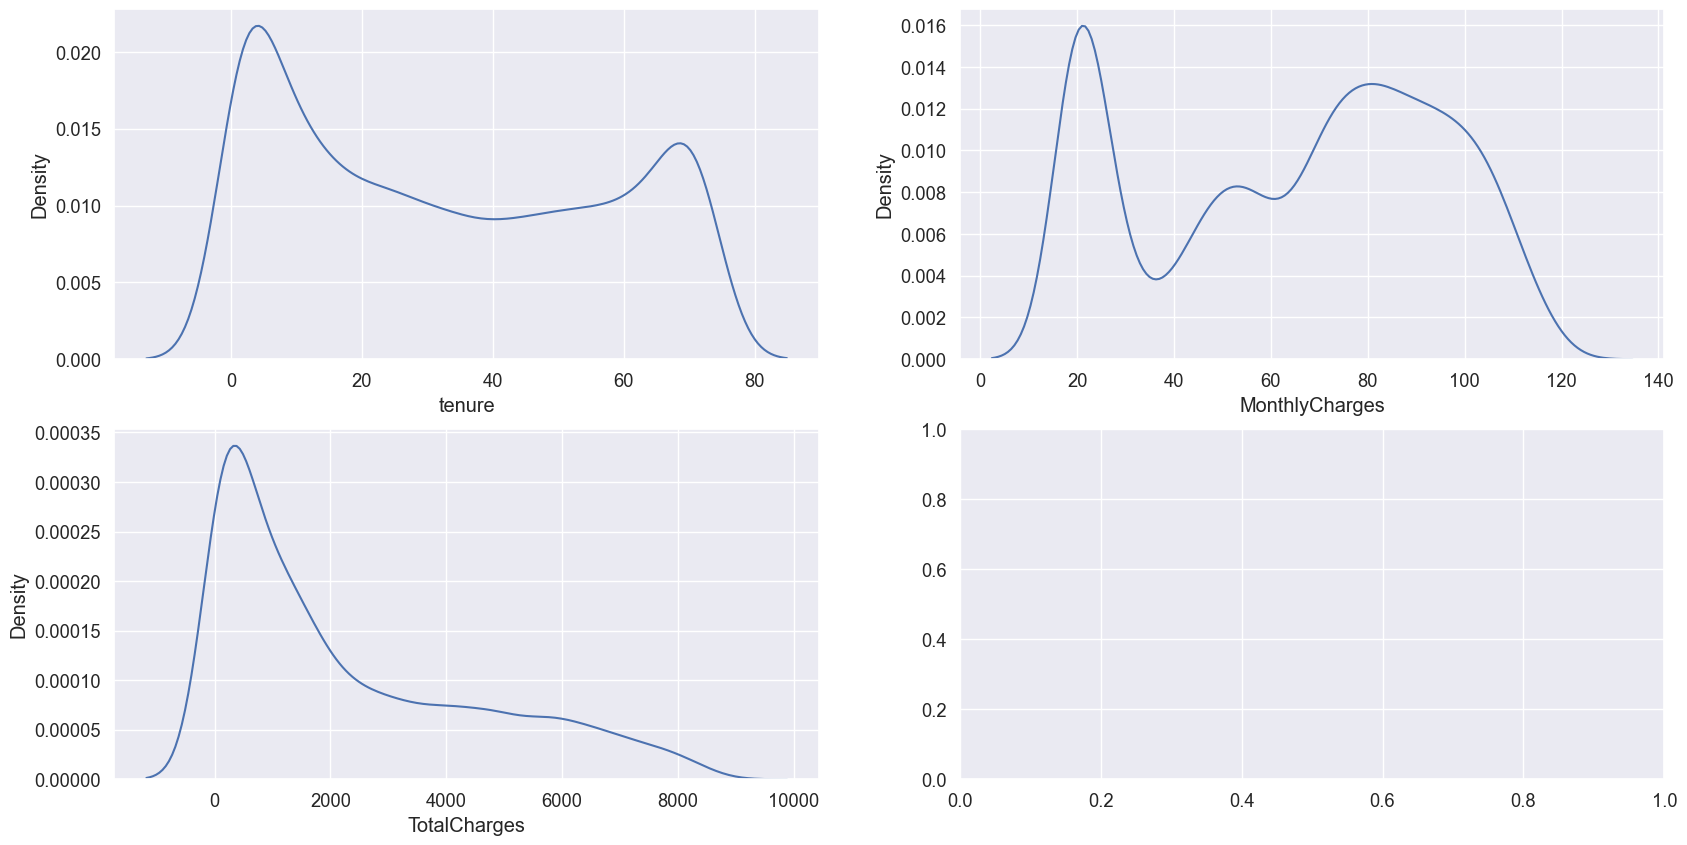

In [17]:
numeric_features = list(df.select_dtypes(include=np.number).columns)

sns.set(font_scale=1.2)
figsize(20, 10)


fig, axes = plt.subplots(2,2, sharex=False, squeeze=False)


for ax, i in zip(axes.ravel(), numeric_features):
    ax = sns.kdeplot(df[i], ax=ax)
   

## Obvious Observations

1. There are no empty values. There were 10 pieces, but we filled them with forecast values.

#### Features with categorical values:

2. There are few pensioners in the dataset.
4. The male sex predominates, but the preponderance is insignificant.
5. The same situation with whether the client is married.
6. Basically, everyone has a communication service. And they use one line.
7. Most (of those with and/or no connections) use a fiber optic connection.
8. Additional services (online security, OnlineBackup and equipment insurance, etc.) are connected to less than 1/3 of users.
9. Most clients are on a monthly renewable perpetual contract.
10. A third of customers pay for services online.
11. Churn is about 20%

#### Features with quantitative values:

12. By the distribution of 'MonthlyCharges' features, we see that most likely there are 2 clusters in the data set - those who pay less and those who pay more.
13. The dataset is dominated by new customers and those who have been using the operator's services for 6 years or more. That is, 2 clusters are planned according to the time of use.
14. The total amount paid by the client for the whole time is evenly distributed from the smallest to the largest: most customers with the smallest total payment.

# 2. Examination of dependencies and formulation of hypothesis

In [18]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44.0,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No


First, let's transform the data.
  - Bring quantitative features to a single scale using MinMaxScaler
  - Categorical features will be reduced to numerical values.

In [19]:
df = df.set_index('customerID')

In [20]:
df[['MonthlyCharges', 'TotalCharges']] = MinMaxScaler().fit_transform(df[['MonthlyCharges', 'TotalCharges']])

In [21]:
objList = df.select_dtypes(include = "object").columns
objList

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [22]:
df.copy()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0.058209,0.197998,No
9688-YGXVR,Female,0,No,No,44.0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.695522,0.456312,No
9286-DOJGF,Female,1,Yes,No,38.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.564179,0.328993,Yes
6994-KERXL,Male,0,No,No,4.0,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0.374627,0.025352,No
2181-UAESM,Male,0,No,No,2.0,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,0.350249,0.011620,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709-LVOEQ,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0.622886,0.354589,No
3115-CZMZD,Male,0,No,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.019900,0.007812,No
2520-SGTTA,Female,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.017413,0.006381,No


In [23]:
feat_dict = {}
feat_dict = feat_dict.fromkeys(list(df.select_dtypes(include=object).columns))
for i in feat_dict:
    feat_dict[i] = LabelEncoder() 

In [24]:
for i, j in feat_dict.items():
    df[i] = j.fit_transform(df[i])

<Axes: title={'center': 'Pearson Correlation of Features'}>

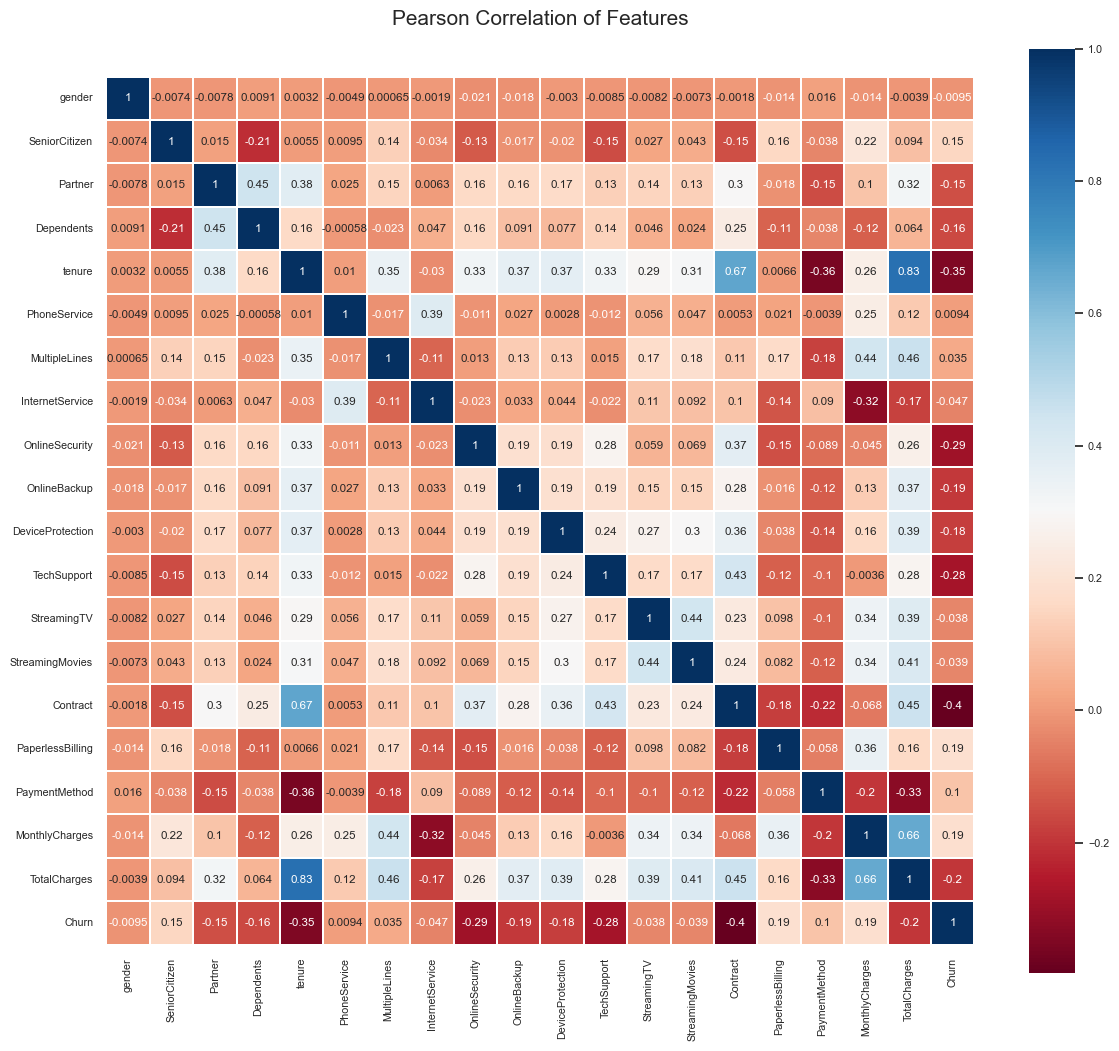

In [25]:
sns.set(font_scale=0.7)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Strongest correlations

In [30]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending = False)

good_c = so[(so<1)&(so>0.4)]
good_c = good_c.drop_duplicates()
good_c

tenure           TotalCharges       0.827126
                 Contract           0.671551
TotalCharges     MonthlyCharges     0.656935
                 MultipleLines      0.458988
Contract         TotalCharges       0.450386
Dependents       Partner            0.449029
MonthlyCharges   MultipleLines      0.436869
StreamingMovies  StreamingTV        0.435575
TechSupport      Contract           0.429494
TotalCharges     StreamingMovies    0.406602
dtype: float64

In [31]:
good_c[0:1]

tenure  TotalCharges    0.827126
dtype: float64

### Observations:
1. We can immediately identify a group of features with a strong correlation. These are service features. This is logical: if the client is, in principle, subscribed to the add. services, then it is not so important to him, if only they are, the principle "it won't get worse" prevails.
2. These obvious connections also indicate that features can be reduced in the dataset for algorithms:
     - more than one line is for the one who has connected the communication service
     - The expenses for the whole period are related to the monthly expenses
     - Availability of additional services affects the month. expenses
     - The presence of a partner determines the presence of dependents
    
3. These 2 connections are also obvious:
- tenure TotalCharges 0.827126
- MonthlyCharges TotalCharges 0.656935

## Simplifсation of the dataset by turning features into add. services into one. The value will be equal to the number of additional services to be executed.

In [32]:
add_services = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
add_services 

['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [33]:
df['AddSrvcs'] = 0

for index, row in df.iterrows():
    s_num = 0
    for i in add_services:
        if row[i] == 2:
            s_num += 1
        else:
            continue
    df.loc[index, 'AddSrvcs'] = s_num

In [34]:
df = df.drop(['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'], axis = 1)

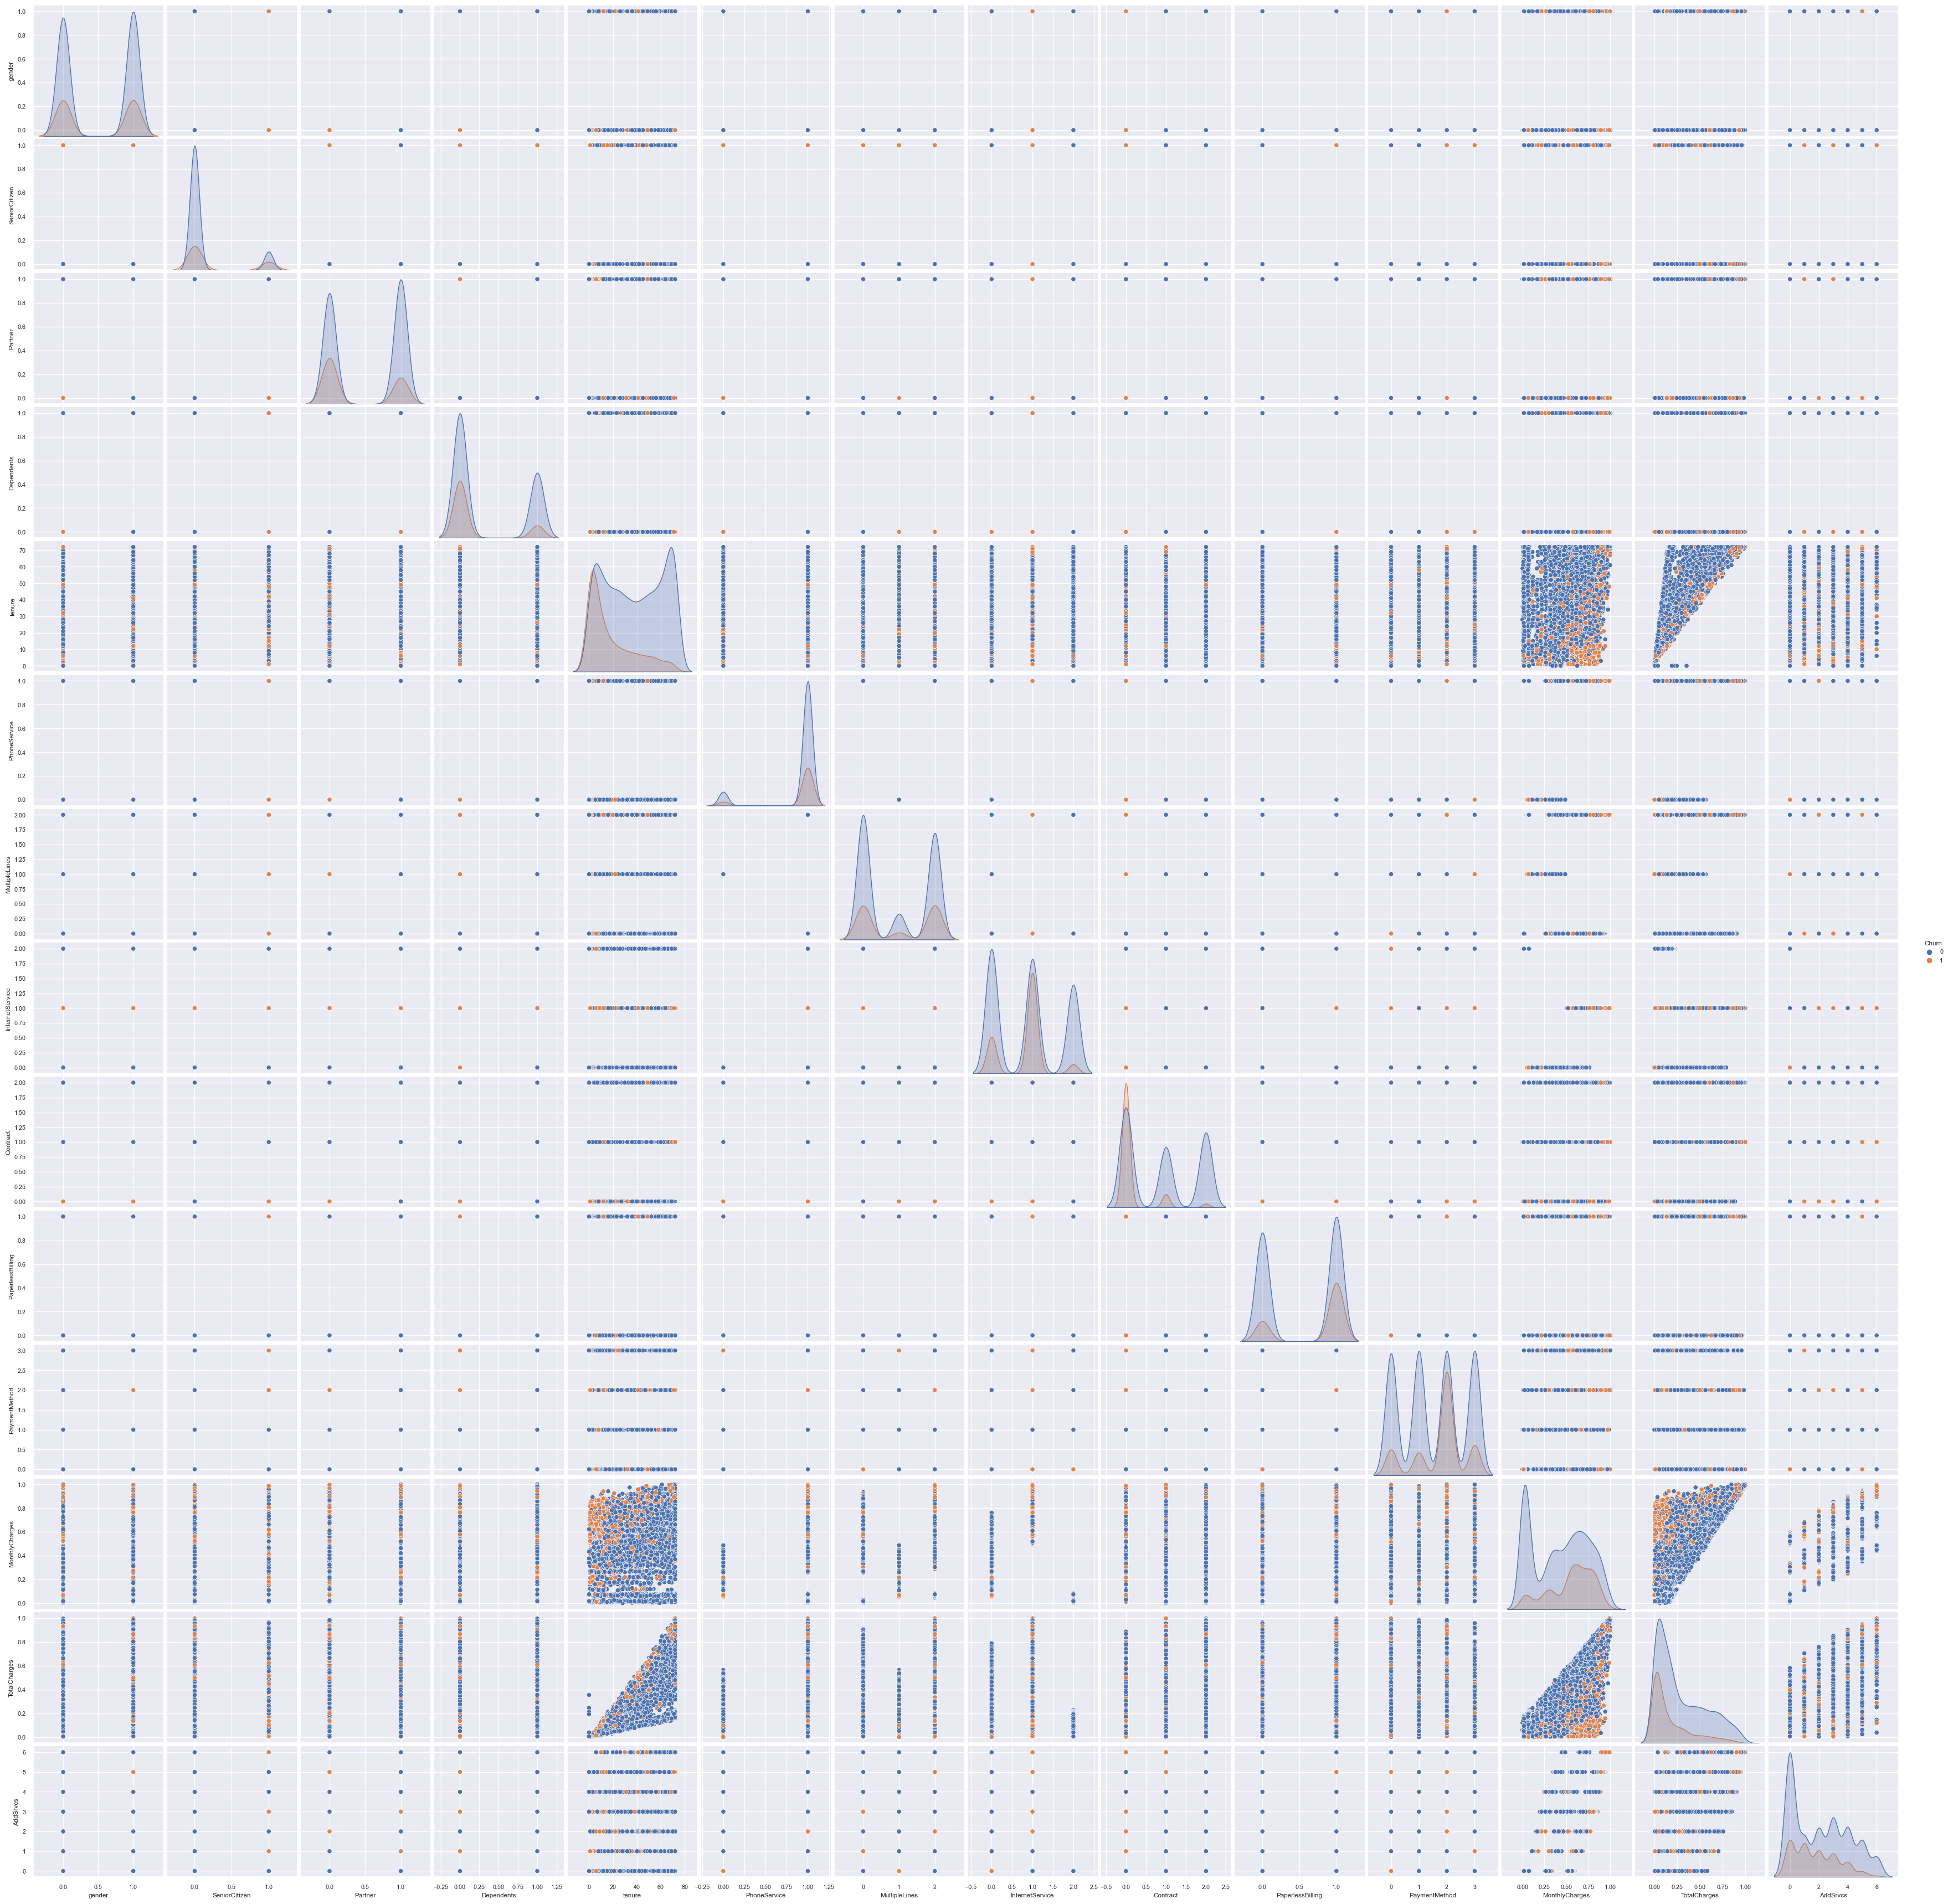

In [35]:
sns.pairplot(df, hue='Churn')

## Correlations worthy of attention

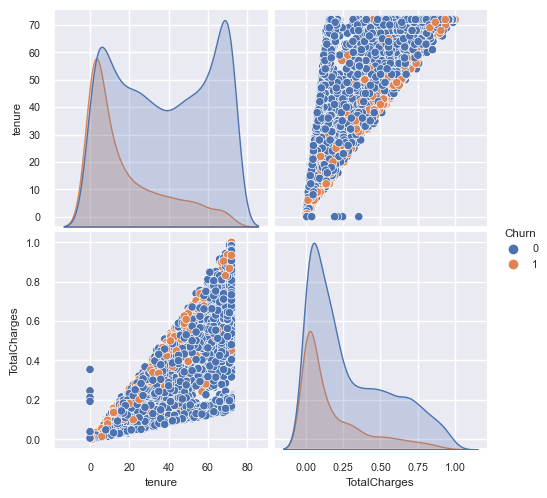

In [88]:
sns.set(font_scale=0.7)

sns.pairplot(df[['tenure','TotalCharges','Churn']],hue='Churn')
plt.show()

# Observation

- 2 clusters are selected in "Tenure" feature. Let's call them T1 and T2
- Note that those who have left belong to the Tenure cluster with a shorter tenure (T1).

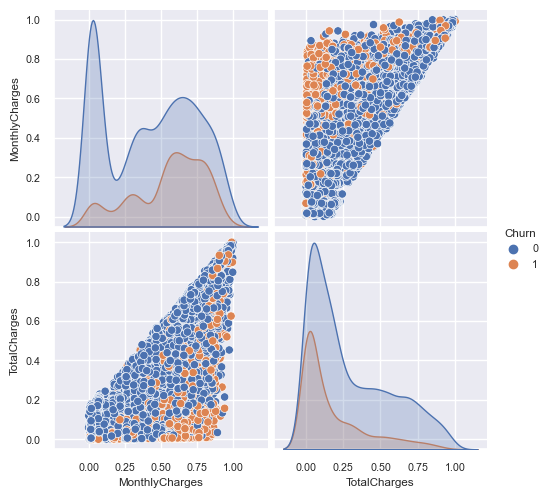

In [44]:
sns.pairplot(df[['MonthlyCharges','TotalCharges','Churn']],hue='Churn')
plt.show()

# Observation
- According to the graph, we see MonthlyCharges clustering. Those who pay more and those who pay less. Let's call it MC1, MC2
- It can be seen that those that have flowed prevail in the MC2 cluster.

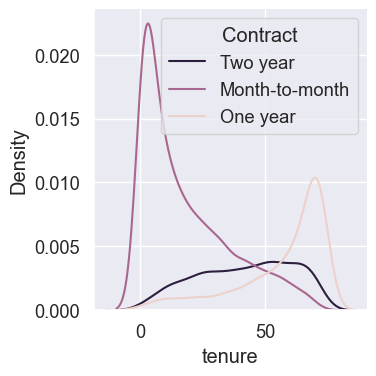

In [17]:
sns.displot(data=df[['tenure','Contract']],x="tenure", hue='Contract', kind="kde", height=4, legend = False)
plt.legend(title='Contract', loc='upper right', labels= list(fact_uniques['Contract']))
plt.show()

## Observation
- New customers - served on a Month-to-month contract
- Long term customers - served under a One Year contract

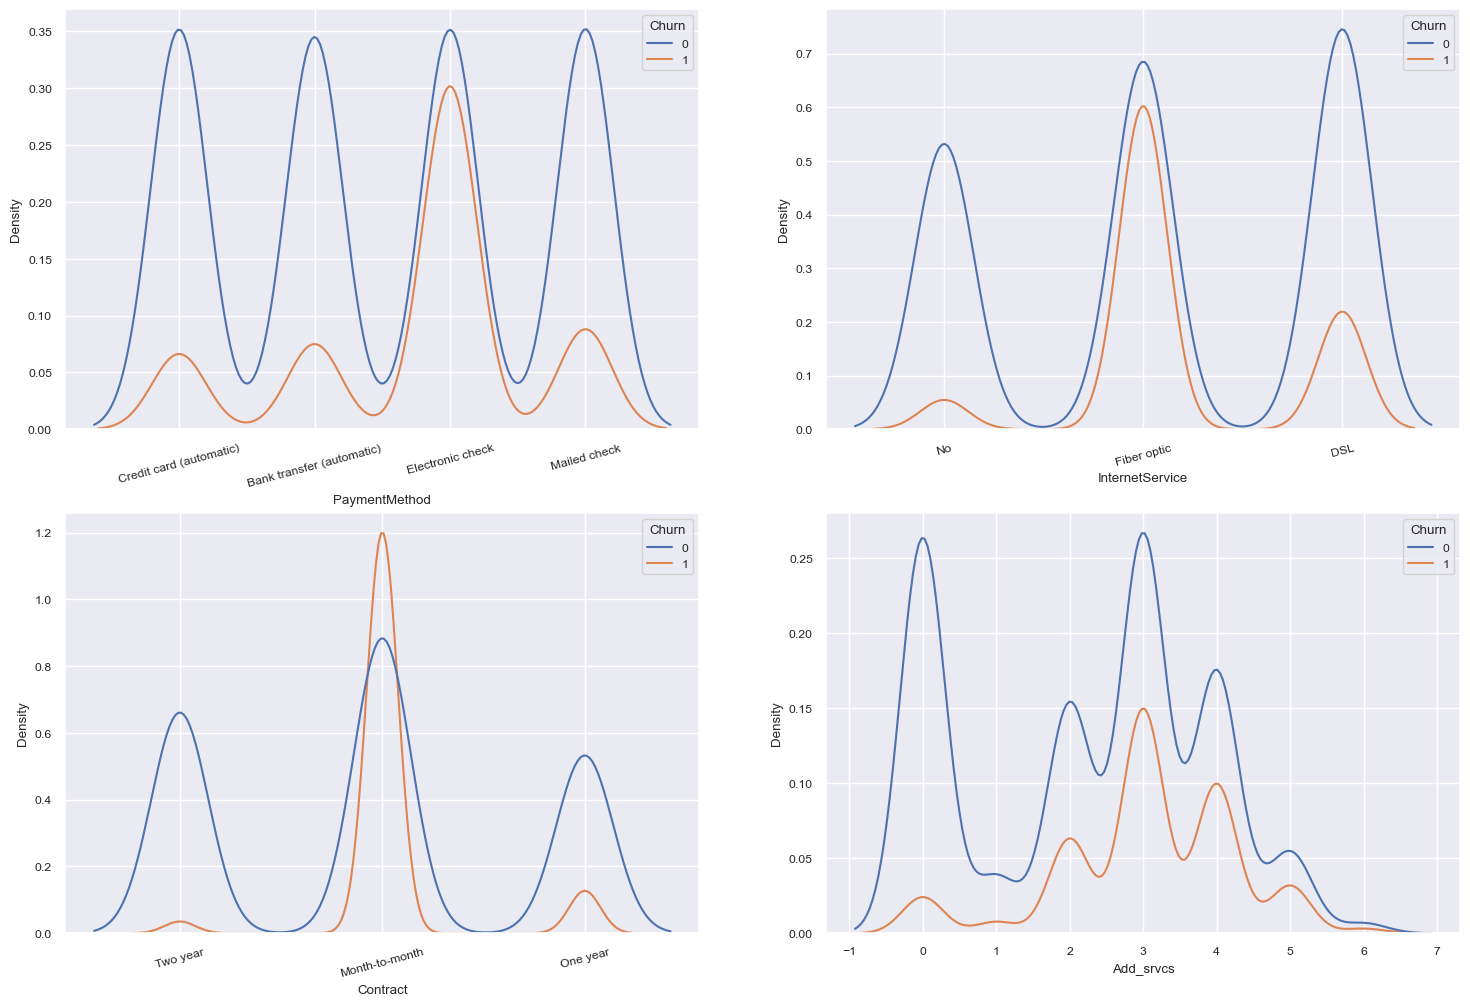

In [18]:
l1= ["PaymentMethod", "InternetService",  'Contract', 'Add_srvcs']

sns.set(font_scale=0.8)
figsize(18,12)

fig, axes = plt.subplots(2,2, sharex=False, squeeze=False)
   
for ax, i in zip(axes.ravel(), l1):
    if i == 'Add_srvcs':
        ax = sns.kdeplot(data=df, x=i, hue="Churn", ax=ax)
    else:
        ax = sns.kdeplot(data=df, x=i, hue="Churn", ax=ax)    
        lbs = [item.get_text() for item in ax.get_xticklabels()]
        lbs = list(fact_uniques[i]) 
        ax.set_xticks(range(0,len(lbs)))
        ax.set_xticklabels(lbs, rotation = 15)
    
    

## Observations
From the charts above, we can see that churn customers are customers who:
- pay using the Electronic Check method
- Use the Internet with the type of connection via fiber optic cable (Fiber optic)
- serviced under a Month-to-month contract
- Use additional services

# Conclusions

###### Portrait of the "churned" client:
- belongs to MC2 and T1, that is, the one who paid a lot per month, but used it for a short time.
- Mainly using Electronic Check payment method
- Use the Internet with the type of connection via fiber optic cable (Fiber optic)
- serviced under a Month-to-month contract
- Use additional services

- additional: rather, this is an elderly man who is married, who has dependents

# 3. Building a Churn Prediction Models

Building models for predicting churn (with justification for choosing a particular model) based on proven hypotheses and identified relationships.

# Goal:
- the goal is to analyze the data and predict the outflow of users
- (to identify people who will renew the contract and who will not renew)


## General observations:

- For our task, we need classification algorithms.
- For our task, it is important to minimize the error with the classification of positive ones (those who have left), that is, recall. It is much more important for us to correctly predict the customers who left, since it cost the company money to attract and retain them. And it is easier and cheaper to retain existing ones than to attract new ones.

Algorithms under consideration:
- XG-Boost
- SVM
- Gradient Boost
- RandomForest
- KNN
- LogReg
- DecisionTree

Let's repeat the study of relatively significant features, this time not based on correlation coefficients,
and based on the coefficients of the Logistic Regression model

In [36]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4788, 14) (4788,)
Test set: (1198, 14) (1198,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: -0.00888
Feature: 1, Score: 0.31189
Feature: 2, Score: 0.01157
Feature: 3, Score: -0.21968
Feature: 4, Score: -0.03898
Feature: 5, Score: -0.31546
Feature: 6, Score: 0.19407
Feature: 7, Score: 0.05367
Feature: 8, Score: -0.79045
Feature: 9, Score: 0.47034
Feature: 10, Score: 0.01707
Feature: 11, Score: 1.68902
Feature: 12, Score: 0.50776
Feature: 13, Score: -0.04960


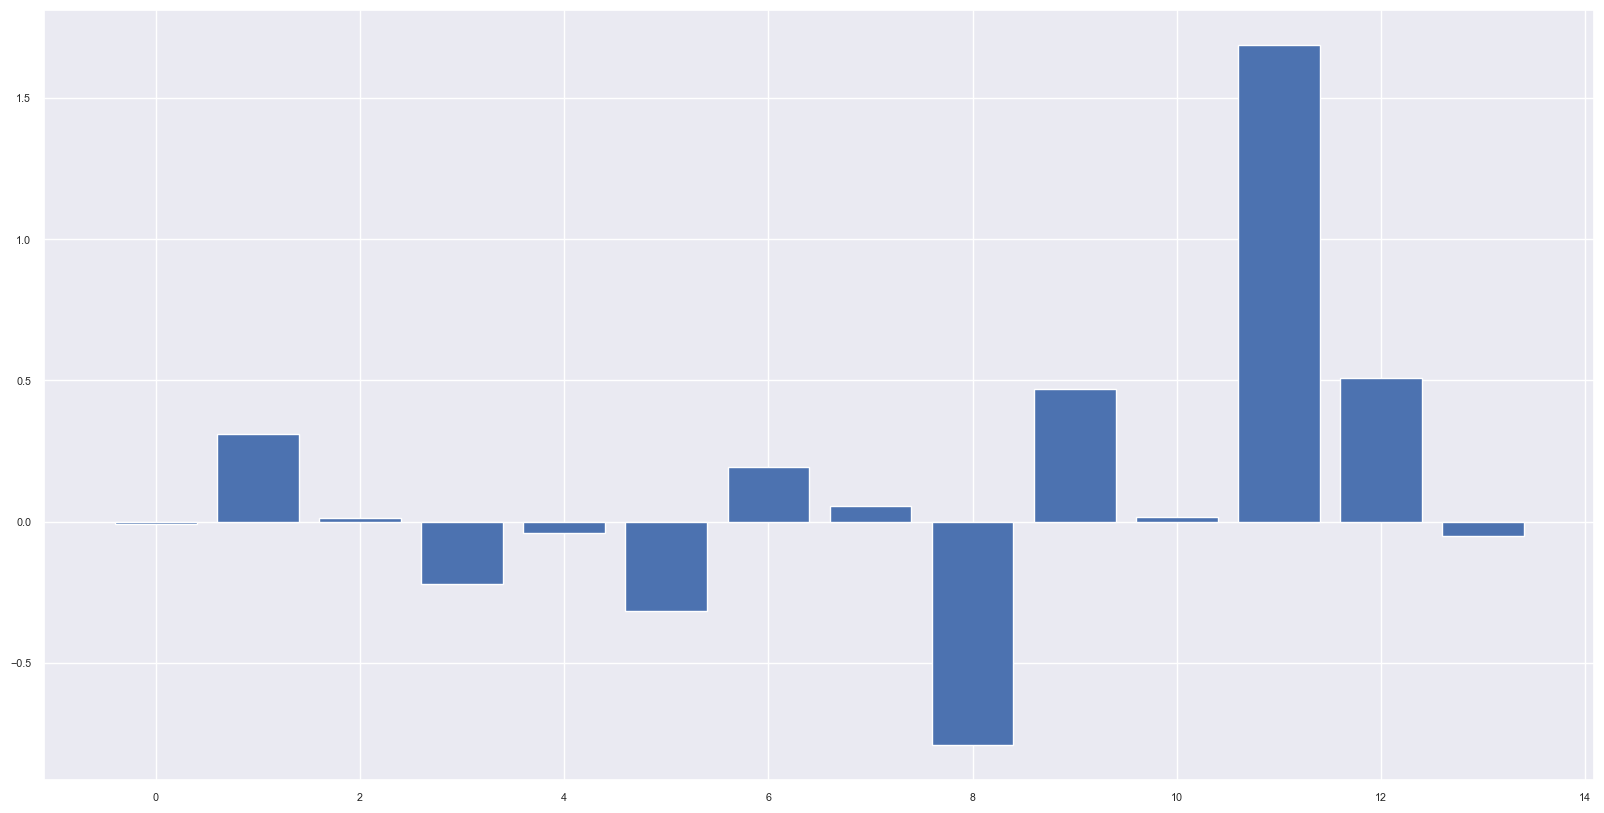

In [37]:
LR = LogisticRegression(C=0.05).fit(X_train,y_train)
importance = LR.coef_[0]

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Observation:
As you can see, features # 0,2,4,10 - do not particularly affect the result, while the key ones are 7,8,9,13

## "Weak" features

In [38]:
[list(X.columns)[i] for i in [0,2,4,10]]

['gender', 'Partner', 'tenure', 'PaymentMethod']

## "Strong" features

In [39]:
[list(X.columns)[i] for i in [7,8,9,13]]

['InternetService', 'Contract', 'PaperlessBilling', 'AddSrvcs']

Let's try to simplify the dataset by throwing out the weak ones:

In [210]:
# df = df.drop([list(X.columns)[i] for i in [0,2,4,10]], axis = 1)

The result is worse (slightly):
For instance, for XGB: (0.7437395659432388, 0.779874213836478, 0.511340206185567, 0.6176836861768369)

Thus, if we needed to simplify the dataset for faster algorithm execution, then we would apply this optimization. In our case, we will continue with the full dataset.

# XG-Boost

In [40]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4788, 14) (4788,)
Test set: (1198, 14) (1198,)


Once again, let's make sure that there are no empty values.

In [41]:
pd.Series({c: df[c].isnull().values.any() for c in df})

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
AddSrvcs            False
dtype: bool

### One-Hot-Encoding for XG_Boost

For XGB to work properly, features with more than 2 classes must be represented as multiple features with binary values. Since XGB works with continuous or discrete values, and otherwise it will evaluate different classes differently - depending on the value of the class number.

In [772]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [707]:
pd.Series({c: df[c].unique() for c in X})

gender                                                         [1, 0]
SeniorCitizen                                                  [0, 1]
Partner                                                        [1, 0]
Dependents                                                     [1, 0]
tenure              [72.0, 44.0, 38.0, 4.0, 2.0, 70.0, 33.0, 1.0, ...
PhoneService                                                   [1, 0]
MultipleLines                                               [2, 0, 1]
InternetService                                             [2, 1, 0]
Contract                                                    [2, 0, 1]
PaperlessBilling                                               [0, 1]
PaymentMethod                                            [1, 0, 2, 3]
MonthlyCharges      [0.05820895522388059, 0.6955223880597016, 0.56...
TotalCharges        [0.1979979229171475, 0.4563120240018463, 0.328...
AddSrvcs                                        [0, 3, 1, 2, 4, 6, 5]
dtype: object

In [773]:
X_encoded = pd.get_dummies(X, columns=['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'AddSrvcs'])

In [159]:
sum(y)/len(y)  

0.2651186100902105

In [709]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4788, 29) (4788,)
Test set: (1198, 29) (1198,)


checking if setting stratify=y worked well

In [246]:
sum(y_train)/len(y_train)

0.2650375939849624

In [247]:
sum(y_test)/len(y_test)

0.2654424040066778

To begin with, let's run the algorithm almost out of the box, optimizing its parameters on the test dataset according to the ROC AUC parameter

In [713]:
xgb_cl = xgb.XGBClassifier(objective = 'binary:logistic', seed = 42, random_state=42)
xgb_cl.fit(X_train,
           y_train, 
           verbose = True,
           early_stopping_rounds = 10,
           eval_metric = 'aucpr',
           eval_set = [(X_test, y_test)])

C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-aucpr:0.61390
[1]	validation_0-aucpr:0.62403
[2]	validation_0-aucpr:0.64739
[3]	validation_0-aucpr:0.64710
[4]	validation_0-aucpr:0.64999
[5]	validation_0-aucpr:0.64890
[6]	validation_0-aucpr:0.65383
[7]	validation_0-aucpr:0.65225
[8]	validation_0-aucpr:0.64700
[9]	validation_0-aucpr:0.64709
[10]	validation_0-aucpr:0.64548
[11]	validation_0-aucpr:0.64293
[12]	validation_0-aucpr:0.64155
[13]	validation_0-aucpr:0.63891
[14]	validation_0-aucpr:0.63934
[15]	validation_0-aucpr:0.64078
[16]	validation_0-aucpr:0.63655


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


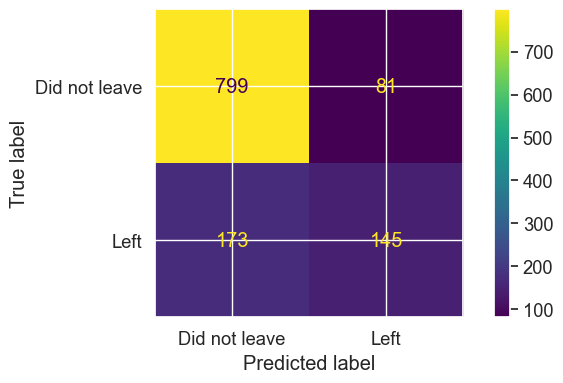

In [714]:
rcParams['figure.figsize'] = 8, 4
plot_confusion_matrix(xgb_cl,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels = ["Did not leave", "Left"])

In [715]:
precision,recall,fscore,support = precision_recall_fscore_support(y_test, xgb_cl.predict(X_test), average='binary')
accuracy = accuracy_score(y_test, xgb_cl.predict(X_test))
accuracy,precision,recall,fscore 

(0.7879799666110183,
 0.6415929203539823,
 0.4559748427672956,
 0.5330882352941176)

In this model, the accuracy of predicting positive (Recall) is 46%
This is due, among other things, to the fact that the data is not balanced (the number of remaining customers is a priori greater)
Since the data is not balanced, we apply the regularization built into XG_Boost scale_pos_weight

In the documentation there is a tip for setting: scale_pos_weight = total_negative_examples / total_positive_examples

Thus: scale_pos_weight = (tolal number - churn)/churn

In [218]:
(len(y)-sum(y))/sum(y)

2.7718966603654693

#### Divided into iterations, we will select parameters using GridSearchCV

In [716]:
skf = StratifiedKFold(n_splits=5, random_state = 17, shuffle=True)

In [717]:
param_grid_1 = {
    'Learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'max_depth': [3, 4, 5],
    'reg_lambda': [10.0, 20, 100],
    'scale_pos_weight': [2.77] }

In [718]:
xgb_grid = GridSearchCV(xgb.XGBClassifier(objective = 'binary:logistic', seed = 42, random_state = 42),
                        param_grid = param_grid_1,
                        scoring = 'roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose = 0) 
xgb_gr_model = xgb_grid.fit(X_train, y_train)
bp_1 = xgb_grid.best_params_           

C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "Learning_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:00:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [719]:
bp_1

{'Learning_rate': 0.1,
 'gamma': 1.0,
 'max_depth': 3,
 'reg_lambda': 100,
 'scale_pos_weight': 2.77}

In [720]:
param_grid_2 = {
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [1,1.25,1.5],
    'max_depth': [3,2,1],
    'reg_lambda': [100,150,170],
    'scale_pos_weight': [2.77]}

In [721]:
xgb_grid = GridSearchCV(xgb.XGBClassifier(objective = 'binary:logistic', seed = 42, random_state = 42),
                        param_grid = param_grid_2,
                        scoring = 'roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose = 0) 
xgb_gr_model = xgb_grid.fit(X_train, y_train)
bp_2 = xgb_grid.best_params_ 

C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [722]:
bp_2

{'gamma': 1,
 'learning_rate': 0.5,
 'max_depth': 3,
 'reg_lambda': 150,
 'scale_pos_weight': 2.77}

C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


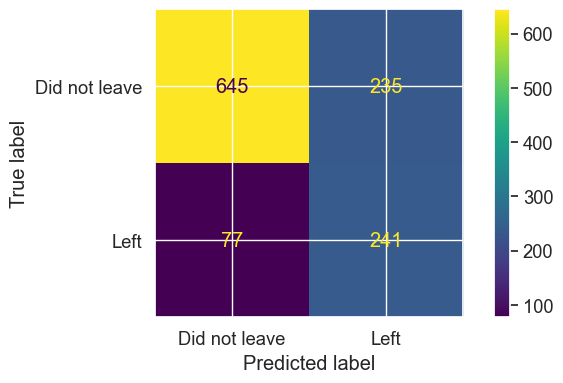

In [723]:
plot_confusion_matrix(xgb_gr_model,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels = ["Did not leave", "Left"])

In [724]:
cm = confusion_matrix(y_test, xgb_gr_model.predict(X_test))
tn, fp, fn, tp = cm.ravel()

Sensitivity = tp/(tp+fn)
Sensitivity

0.7578616352201258

In [725]:
precision,recall,fscore,support = precision_recall_fscore_support(y_test, xgb_gr_model.predict(X_test), average='binary')
accuracy = accuracy_score(y_test, xgb_gr_model.predict(X_test))
accuracy, precision,recall, fscore

(0.7395659432387313,
 0.5063025210084033,
 0.7578616352201258,
 0.6070528967254407)

# Conclusion:
We will assume that the task has been completed, since the recall has increased significantly.
Of course, we sacrificed the overall accuracy, but in our case this is justified. And, it should be noted that the F-measure has grown significantly, which means that our model obtained through iterations of cross-validation is more optimal than the original one.

# SVM

SVM also works with continuous or discrete values. Therefore, we will also apply One-Hot Encoding, or rather, we will take the already transformed data from XGB.

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [273]:
X_train_scaled = scale(X_train) 
X_test_scaled = scale(X_test)

Let's try it out of the box and see what happens.

In [285]:
svm_cl = SVC(random_state = 42)
svm_cl.fit(X_train_scaled, y_train)

SVC(random_state=42)

C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


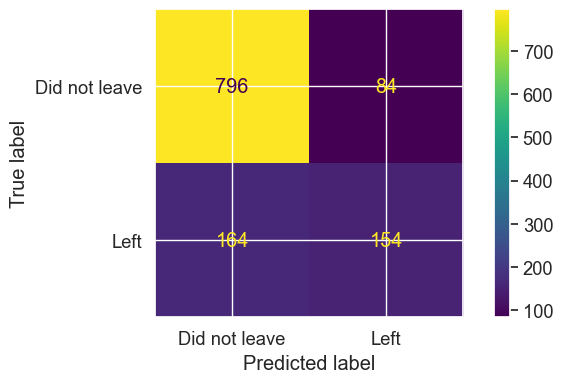

In [286]:
plot_confusion_matrix(svm_cl,
                     X_test_scaled,
                     y_test,
                     values_format = 'd',
                     display_labels = ["Did not leave", "Left"])

In [287]:
precision,recall,fscore,support = precision_recall_fscore_support(y_test, svm_cl.predict(X_test_scaled), average='binary')
accuracy = accuracy_score(y_test, svm_cl.predict(X_test_scaled))
accuracy, precision, recall, fscore

(0.7929883138564274,
 0.6470588235294118,
 0.48427672955974843,
 0.5539568345323741)

The result is comparable (slightly better) to the untuned XGB (0.7838063439065108, 0.6266094420600858, 0.4591194968553459, 0.52994555353902)

Let's immediately take into account that our dataset is unbalanced and we apply different weights for classes. We will provide selection by means of cv.

In [288]:
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]

In [298]:
param_grid_1 = { 'kernel': ['rbf'],
              'gamma' : [0.1, 0.01, 0.001, 0.0001],
              'C': [0.5, 1, 10, 100],
              'class_weight': balance }

In [299]:
svc_grid = GridSearchCV(SVC(random_state = 42), param_grid = param_grid_1, cv=skf, n_jobs=-1, scoring='roc_auc',)
svc_gr_model = svc_grid.fit(X_train_scaled, y_train)
bp_svc_1 = svc_grid.best_params_ 

In [300]:
bp_svc_1

{'C': 1, 'class_weight': {0: 1, 1: 10}, 'gamma': 0.0001, 'kernel': 'rbf'}

In [301]:
param_grid_2 = { 'kernel': ['rbf'],
              'gamma' : [0.0001,0.00005,0.00002],
              'C': [1],
              'class_weight': [{0: 1, 1: 10}] }

In [302]:
svc_grid = GridSearchCV(SVC(random_state = 42), param_grid=param_grid_2, cv=skf, n_jobs=-1, scoring='roc_auc')
svc_gr_model = svc_grid.fit(X_train_scaled, y_train)
bp_svc_2 = svc_grid.best_params_ 

In [303]:
bp_svc_2

{'C': 1, 'class_weight': {0: 1, 1: 10}, 'gamma': 0.0001, 'kernel': 'rbf'}

C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


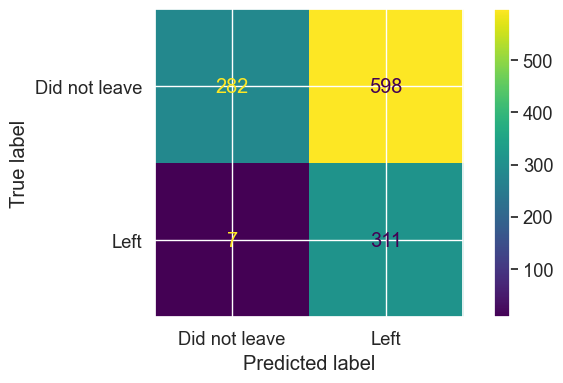

In [304]:
plot_confusion_matrix(svc_gr_model,
                     X_test_scaled,
                     y_test,
                     values_format = 'd',
                     display_labels = ["Did not leave", "Left"])

In [306]:
precision,recall,fscore,support = precision_recall_fscore_support(y_test, svc_gr_model.best_estimator_.predict(X_test_scaled), average='binary')
accuracy = accuracy_score(y_test, svc_gr_model.best_estimator_.predict(X_test_scaled))
accuracy,precision,recall,fscore 

(0.494991652754591,
 0.34213421342134215,
 0.9779874213836478,
 0.5069274653626732)

From the point of view of recall, they are simply incredible, we determine with almost 100% accuracy those who will withdraw. But we sacrifice overall accuracy (accuracy), which is not optimal, in my opinion.

Let's try to approximate the data through PCA and note the SVM after the approximation

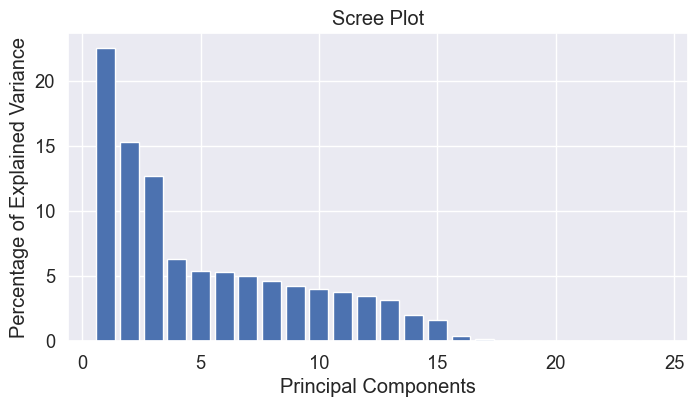

In [307]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var)
#plt.tick_params(
#    axis='x',
#    which= 'both',
#    bottom= False,
#    top=False,
#    Labelbottom=False) 
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [308]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]
train_pc3_coords = X_train_pca[:,3]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords, train_pc3_coords)))

Let's take the same parameters for CV (param_grid_1)

In [310]:
svc_pca_grid = GridSearchCV(SVC(random_state = 42), param_grid = param_grid_1, cv=skf, n_jobs=-1, scoring='roc_auc')
svc_pca_gr_model = svc_grid.fit(pca_train_scaled, y_train)
bp_svc_1 = svc_grid.best_params_ 
bp_svc_1 

{'C': 1, 'class_weight': {0: 1, 1: 10}, 'gamma': 0.0001, 'kernel': 'rbf'}

In [313]:
param_grid_2 = { 'kernel': ['rbf'],
              'gamma' : [0.0001,0.00005,0.00002],
              'C': [1],
              'class_weight': {0: 1, 1: 10} }

In [314]:
svc_pca_grid = GridSearchCV(SVC(random_state = 42), param_grid = param_grid_2, cv=skf, n_jobs=-1, scoring='roc_auc')
svc_pca_gr_model = svc_grid.fit(pca_train_scaled, y_train)
bp_svc_2 = svc_grid.best_params_ 
bp_svc_2 

{'C': 1, 'class_weight': {0: 1, 1: 10}, 'gamma': 0.0001, 'kernel': 'rbf'}

In [317]:
X_test_pca = pca.fit_transform(X_test_scaled)

test_pc1_coords = X_test_pca[:,0]
test_pc2_coords = X_test_pca[:,1]
test_pc3_coords = X_test_pca[:,3]

pca_test_scaled = scale(np.column_stack((test_pc1_coords, test_pc2_coords, test_pc3_coords)))

C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


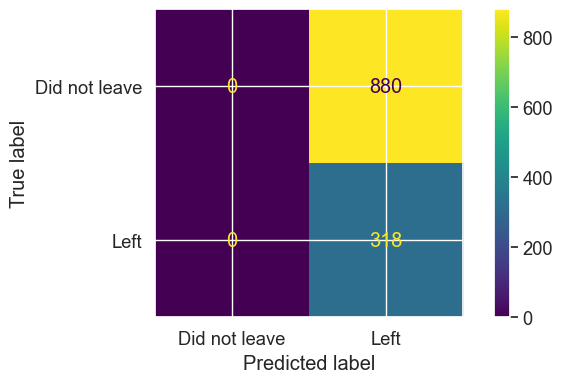

In [318]:
plot_confusion_matrix(svc_pca_gr_model,
                     pca_test_scaled,
                     y_test,
                     values_format = 'd',
                     display_labels = ["Did not leave", "Left"])

In [321]:
precision,recall,fscore,support = precision_recall_fscore_support(y_test, svc_pca_gr_model.best_estimator_.predict(pca_test_scaled), average='binary')
accuracy = accuracy_score(y_test, svc_pca_gr_model.best_estimator_.predict(pca_test_scaled))
accuracy,precision,recall,fscore

(0.2654424040066778, 0.2654424040066778, 1.0, 0.41952506596306066)

It turned out extreme. An absolute hit in recall, but such an accuracy value is definitely not suitable.

Алгоритм SVM плохо себя неплохо, но не оптимально.

# Conclusion:

The SVM algorithm is badly behaved not bad, but not optimal.

## Other algorithms

Considering the remaining 5 algorithms.
- Gradient Boost
- RandomForest
- KNN
- logreg
- DecisionTree

We will also find their optimal settings using CV.


In [322]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4788, 14) (4788,)
Test set: (1198, 14) (1198,)


In [323]:
params = {
'gbc': {'learning_rate': np.arange(0.1, 0.6, 0.1)}, # GradientBoostingClassifier

'rfc': {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)},
 
'knn': {'n_neighbors': [25,50,75,100]}, #KNeighborsClassifier

'lr': {'C': np.arange(0.5, 1, 0.1)}, #LogisticRegression
    
'DT': {'max_depth': [5,15,25], #DecisionTreeClassifier
      'min_samples_split': [40,20,10],
      'max_features': ['auto']}
                                            }

In [325]:
models = {'gbc': {'type': GradientBoostingClassifier(random_state=42), 'best_model_trained': [], 'best_params': [], 'accuracy': [], 'recall': [], 'precision': [], 'fscore': []  }, 
          'rfc': {'type': RandomForestClassifier(random_state=42), 'best_model_trained': [], 'best_params': [], 'accuracy': [], 'recall': [], 'precision': [], 'fscore': []  },
          'lr' : {'type': LogisticRegression(random_state=42), 'best_model_trained': [], 'best_params': [], 'accuracy': [], 'recall': [], 'precision': [], 'fscore': []  },
          'knn': {'type': KNeighborsClassifier(), 'best_model_trained': [], 'best_params': [], 'accuracy': [], 'recall': [], 'precision': [], 'fscore': []  },
          'DT' : {'type': DecisionTreeClassifier(random_state=42), 'best_model_trained': [], 'best_params': [], 'accuracy': [], 'recall': [], 'precision': [], 'fscore': []  }
          
         }

In [328]:
for i in models.keys():
    grid = GridSearchCV(models[i]['type'], params[i], cv=skf, n_jobs = -1) 
    gr_model = grid.fit(X_train, y_train)
    best_trained = gr_model.best_estimator_.fit(X_train, y_train)
    bp = grid.best_params_ 
    prediction = best_trained.predict(X_test)
    precision,recall,fscore,support = precision_recall_fscore_support(y_test, prediction, average='binary')
    accuracy = accuracy_score(y_test, prediction)
    models.get(i).update([('best_model_trained', best_trained ), ('best_params', bp), 
                        ('accuracy', accuracy), ('precision', precision), ('recall', recall), ('fscore',fscore)])

C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bystrov Aleksandr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [329]:
for key in models:
    print(str(key) + " : " + str(models[key]['best_params']))

gbc : {'learning_rate': 0.1}
rfc : {'min_samples_leaf': 4, 'n_estimators': 50}
lr : {'C': 0.7}
knn : {'n_neighbors': 100}
DT : {'max_depth': 25, 'max_features': 'auto', 'min_samples_split': 40}


In [331]:
for key in models:
    print(str(key) + " accuracy: " + str(round(models[key]['accuracy'],3)) +  
                    ' precision: ' + str(round(models[key]['precision'],3)) +
                      "  recall: " + str(round(models[key]['recall'],3)) +
                      ' fscore: ' + str(round(models[key]['fscore'],3)) )    

gbc accuracy: 0.8 precision: 0.661  recall: 0.503 fscore: 0.571
rfc accuracy: 0.794 precision: 0.656  recall: 0.469 fscore: 0.547
lr accuracy: 0.803 precision: 0.667  recall: 0.516 fscore: 0.582
knn accuracy: 0.784 precision: 0.658  recall: 0.387 fscore: 0.487
DT accuracy: 0.78 precision: 0.624  recall: 0.434 fscore: 0.512


In [ ]:
(0.784, 0.627, 0.459, 0.530)

In [ ]:
(0.744, 0.512, 0.761, 0.612)

# 4. Comparing the quality of models

    accuracy  precision recall fscore
- SVM_CV (0.494, 0.342, 0.978, 0.507)
- XGB (0.740, 0.506, 0.758, 0.607)
- LR_  ( 0.803, 0.667, 0.516, 0.582)
- GBC (0.800, 0.661, 0.503, 0.571)
- RFC (0.794, 0.656, 0.469, 0.547)
- SVM (0.792, 0.647, 0.484, 0.554)
- DT_  (0.780, 0.624, 0.434, 0.512)
- KNN (0.784, 0.658, 0.387, 0.487)

*Values sorted by recall value

# Conclusions:
- The task of maximizing recall was best handled by SVM, but from the point of view of the other parameters accuracy, precision and fscore, the algorithm is far from optimal.
- XG Boost is selected as the most optimal algorithm. The recall indicator is the highest (if we do not take into account the extreme case of SVM) with the highest fscore and high accuracy.
- Extimal (XGBoost), conventional (non-extremal) gradient boosting and logistic regression algorithms go side by side, which proves their fundamental similarity. Also, practice has shown that it is not for nothing that XG Boost is one of the most popular machine learning algorithms.
- The most unimportant result was shown by the KNN algorithm. Which was required to be proved, because as the data visualization showed, the data overlap each other.

#### Let's check the portrait of the "churned" user, compiled in the part of data analysis.

- belongs to MC2 and T1, that is, the one who paid a lot per month, but used sevices for a short time.
- Mainly using Electronic Check payment method
- Use the Internet with the type of connection via fiber optic cable (Fiber optic)
- serviced under a Month-to-month contract
- Use additional services
- additional: rather, this is an elderly man who is married, who has dependents

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4788, 14) (4788,)
Test set: (1198, 14) (1198,)


In [805]:
X_test['churn'] =  xgb_gr_model.predict(X_test)

In [806]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [807]:
X_test = undummify(X_test)

In [811]:
for i, j in feat_dict.items():
    if i in list(X_test.columns):
        X_test[i] = j.inverse_transform(X_test[i].astype(int))
    else:
        continue

In [812]:
for i in ['PaymentMethod','InternetService', 'Contract', 'AddSrvcs','SeniorCitizen', 'Partner', 'Dependents']:
    print(i  + ":  " + str(X_test[X_test['churn']==1][i].value_counts().idxmax()))

PaymentMethod:  Electronic check
InternetService:  Fiber optic
Contract:  Month-to-month
AddSrvcs:  1
SeniorCitizen:  0
Partner:  No
Dependents:  No


In [808]:
X_test[X_test['churn']==1].tenure.mean()

16.5

## Analytical portrait:
- belongs to MC2 and T1, that is, the one who paid a lot per month, but used services for a short time.
- Mainly using Electronic Check payment method
- Use the Internet with the type of connection via fiber optic cable (Fiber optic)
- serviced under a Month-to-month contract
- Use additional services
- additional: rather, this is an elderly man who is married, who has Dependents

## Conclusion:


Proret conforms partially (by 50%). Not confirmaed items are:

###### Additional services

- Portrait: Uses
- The most common value in the test dataset: uses little or no use (see below)

###### Pensioner:

- Portrait: Yes
- Most frequent value in the test dataset: No

###### Married:

- Portrait: yes
- Most frequent value in the test dataset: No

###### Dependents:

- Portrait: Yes
- Most frequent value in the test dataset: No

###### This can be partly explained by the fact that gender and partner features were on the list of identified "weak" features
['gender', 'Partner', 'tenure', 'PaymentMethod']